In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDRegressor,SGDClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,roc_curve,auc,roc_auc_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
import joblib as joblib
from pandas.api.types import is_string_dtype,is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

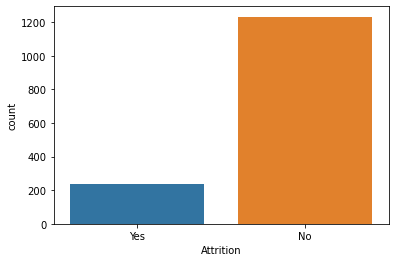

In [7]:
sns.countplot(data=df,x='Attrition')

In [8]:
#employee Attrition yes count less than no count .Means active employee count is more than ex employee count

In [9]:
df_mean=df.groupby(['Attrition']).mean()['YearsWithCurrManager']
df_mean
#avg year of working with current manager for ex-employee is 2.86 which is less than current employee

Attrition
No     4.367397
Yes    2.852321
Name: YearsWithCurrManager, dtype: float64

In [10]:
df_promotion=df.groupby(['Attrition']).mean()['YearsSinceLastPromotion']
df_promotion

Attrition
No     2.234388
Yes    1.945148
Name: YearsSinceLastPromotion, dtype: float64

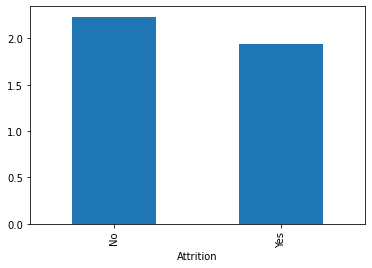

In [11]:
df_promotion.plot(kind='bar')
#ex-employee got less promotion compare to existing employee 

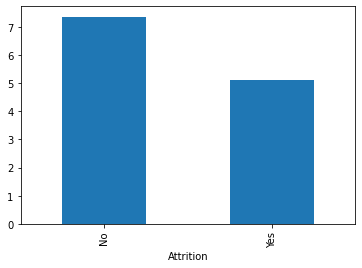

In [12]:
df_years=df.groupby(['Attrition']).mean()['YearsAtCompany']
df_years.plot(kind='bar')
#current employee having more exp in same company compare to ex employee

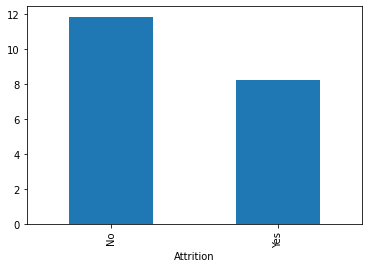

In [13]:
df_exp=df.groupby(['Attrition']).mean()['TotalWorkingYears']
df_exp.plot(kind='bar')
#current employee having more total years of exp compare to ex employee

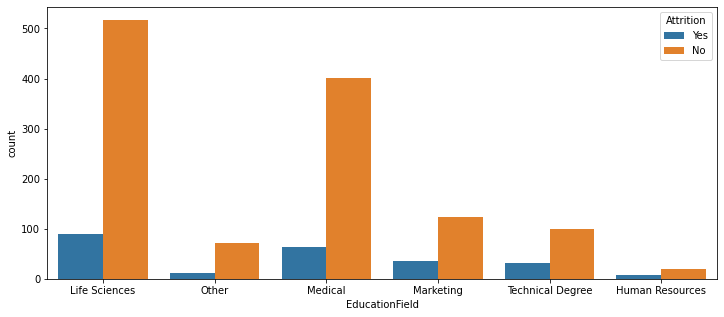

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='EducationField',hue='Attrition')
#Lots of employees are from Life Science and Medical background 
#Also more ex-employees are from marketing and technical background

In [15]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

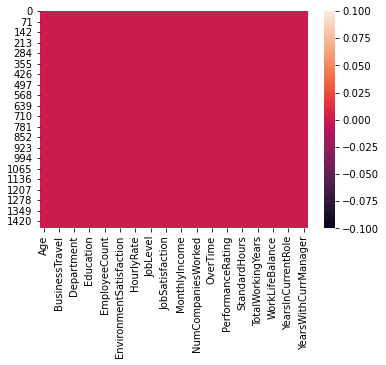

In [16]:
sns.heatmap(df.isnull())
#no missing values or null values

In [17]:
df.isin(['?']).sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
#converting string data into numeric 
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

In [19]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

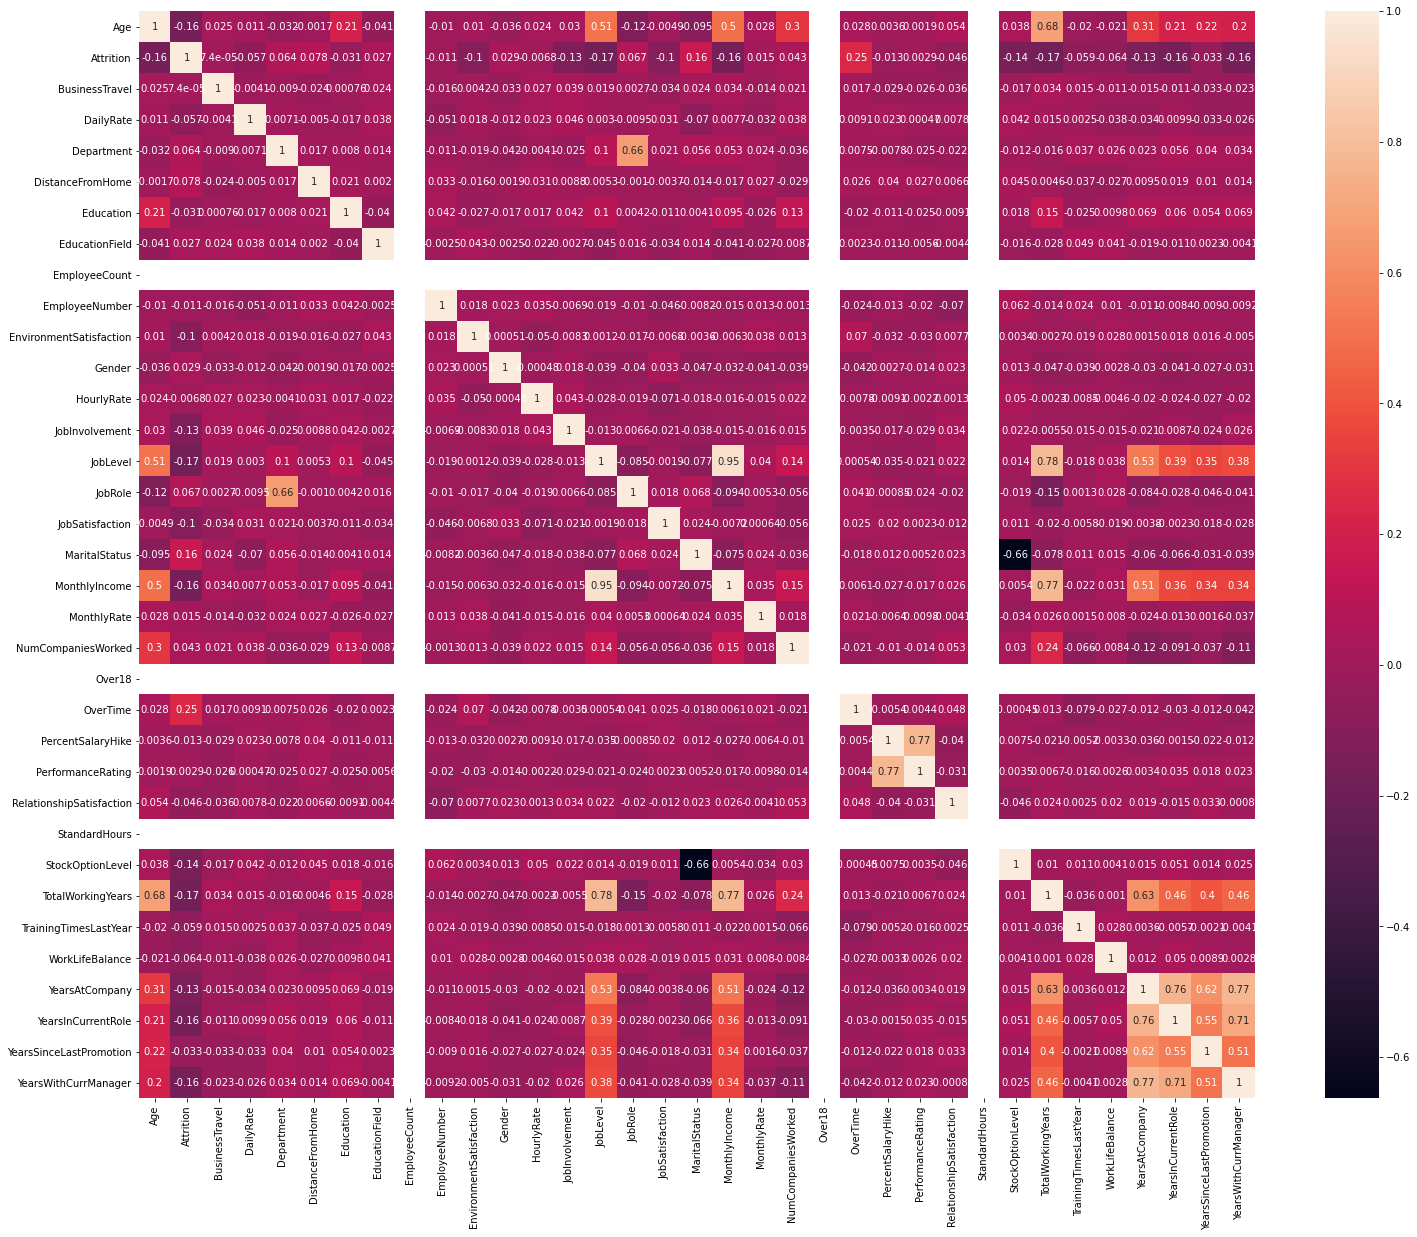

In [20]:
corr_=df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(data=corr_,annot=True)
#employeecount,over18,standardhours columns does not have any relation with target variable .remove them .


In [21]:
df=df.drop(['Over18','EmployeeCount','StandardHours'],axis=1)
df.shape

(1470, 32)

In [22]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
#Thr is little diff between mean and 50% .We can say thr is few skwewd data present in dataset .
#Thr is some diff between 75% and max .Means few outliers present in data .

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBD0E2B0A0>,
      dtype=object)

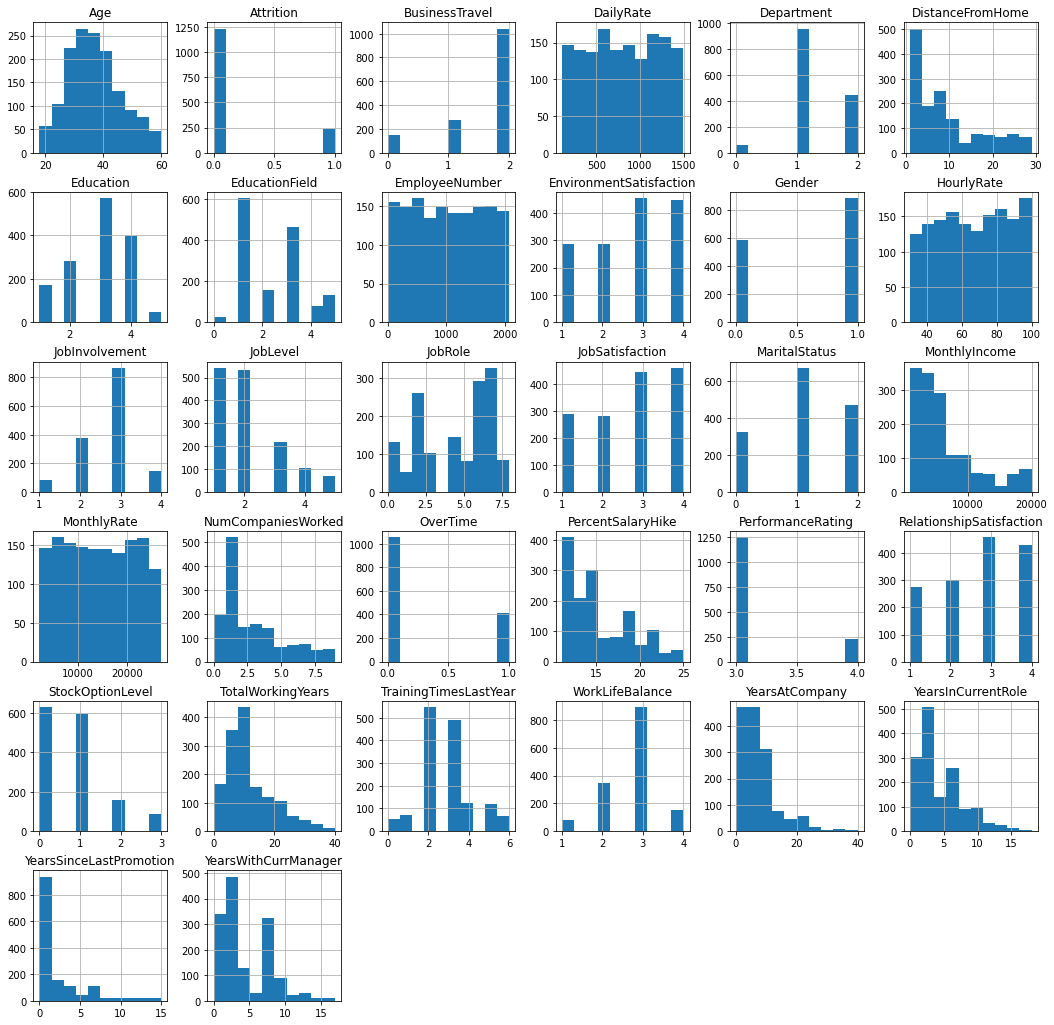

In [24]:
df.hist(figsize=(18,18))

In [25]:
#from above graph it is shown that totalworkingyears,yearswithcurrmanager,monthlyincome,distancefromhome has skewed data

In [26]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
Attrition                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
BusinessTravel              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Department                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Education                      AxesSubplot(0.125,0.642714;0.110714x0.107857)
EducationField              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
EmployeeNumber              AxesSubplot(0.390714,0.642714;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.523571,0.642714;0.110714x0.107857)
Gender                      AxesSubplot(0.656429,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.789286,0.642714;0.110714x0.107857)
JobInvolvement                 AxesSubplot(0.125,0.513286;0.110714x0.107857)

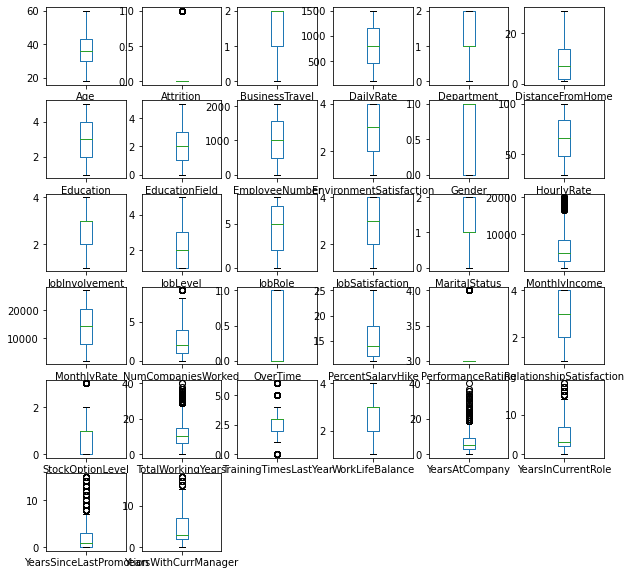

In [27]:
df.plot.box(layout=(6,6),subplots=True,figsize=(10,10))

In [28]:
#few outlier presents in yearsincelastpromotion,yearswithcurrmanager,totalworkyear,yearatcomp columns has outliers

In [29]:
#remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(1387, 32)

In [30]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [31]:
#remove skewed data after separating x and y variable
x=df.drop(['Attrition'],axis=1)
x.shape

(1387, 31)

In [32]:
y=df['Attrition']
y.shape

(1387,)

In [33]:
#remove skewed data where skewness is > 0.55
for col in x.columns:
    if(x[col].skew()>0.55):
        x[col]=np.log1p(x[col])


In [34]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,0.693147,2,1,1,2,0,...,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,1,2,3,1,...,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,2,1373,1,1.098612,2,4,4,4,1,...,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,1,5,4,0,...,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,2,591,1,1.098612,1,3,7,1,1,...,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,3.178054,2,3,2061,3,1,...,1.386294,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294
1466,39,2,613,1,1.945910,1,3,2062,4,1,...,1.386294,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442
1467,27,2,155,1,1.609438,3,1,2064,2,1,...,1.609438,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294
1468,49,1,1023,2,1.098612,3,3,2065,4,1,...,1.386294,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225


In [35]:
def findBestParam(reg_obj,param_arr):
    grid_cv=GridSearchCV(reg_obj,param_arr,cv=10)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [36]:
lr=LogisticRegression()

mul_nb=MultinomialNB()
gaus_nb=GaussianNB()
svr=SVC()


In [37]:
params_={'criterion':['gini','entropy'],'max_depth':[2,5,10]}
dtree_reg=DecisionTreeClassifier()
print("dtree_reg best param :",findBestParam(dtree_reg,params_))
dtree_reg=DecisionTreeClassifier(criterion='gini',max_depth=2)

dtree_reg best param : {'criterion': 'gini', 'max_depth': 2}


In [38]:
params_={'n_neighbors':[5,10,15,20]}
kn_reg=KNeighborsClassifier()
print("kn_reg best param :",findBestParam(kn_reg,params_))
kn_reg=KNeighborsClassifier(n_neighbors=15)

kn_reg best param : {'n_neighbors': 15}


In [39]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0],'penalty':['l1','l2','elasticnet']}
sgd_reg=SGDClassifier()
print("sgd_reg best param :",findBestParam(sgd_reg,params_))
sgd_reg=SGDClassifier(alpha=0.0001,penalty='elasticnet')

sgd_reg best param : {'alpha': 0.0001, 'penalty': 'elasticnet'}


In [40]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}
gradient_reg=GradientBoostingClassifier()
print("gradient_reg best param :",findBestParam(gradient_reg,params_))
gradient_reg=GradientBoostingClassifier(learning_rate=0.1)

gradient_reg best param : {'learning_rate': 0.1}


In [41]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'base_estimator':[dtree_reg,kn_reg,sgd_reg]}
ada_reg=AdaBoostClassifier()
print("ada_reg best param :",findBestParam(ada_reg,params_))
ada_reg=AdaBoostClassifier(base_estimator=dtree_reg,learning_rate=0.1)

ada_reg best param : {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1}


In [42]:
params_={'n_estimators':[10,50,100,150,200],'max_depth':[2,5,10,15],'criterion':['gini','entropy']}
rand_reg=RandomForestClassifier()
print("rand_reg best param :",findBestParam(rand_reg,params_))

rand_reg best param : {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 50}


In [49]:
rand_reg=RandomForestClassifier(criterion='gini',max_depth=15,n_estimators=50)

In [44]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))
models.append(('GaussianNB',gaus_nb))
models.append(('MultinomialNB',mul_nb))
models.append(('Gradient Boost',gradient_reg))
models.append(('Ada Boost',ada_reg ))
models.append(('RandomForestClassifier',rand_reg))

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]
roc_auc_score_list=[]
f1_score_list=[]
precission_score_list=[]
recall_score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    roc_auc_score_list.append(roc_auc_score(y_test,y_pred))
    f1_score_list.append(f1_score(y_test,y_pred))
    precission_score_list.append(precision_score(y_test,y_pred))
    recall_score_list.append(recall_score(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [54]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list,'roc_auc_score':roc_auc_score_list,'f1_score':f1_score_list,'precision_Score':precission_score_list,'recall_score':recall_score_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score,roc_auc_score,f1_score,precision_Score,recall_score
0,LogisticRegression,0.846439,0.834532,0.557692,0.206897,1.000000,0.115385
1,SVC,0.834897,0.812950,0.500000,0.000000,0.000000,0.000000
2,DecisionTreeClassifier,0.843541,0.816547,0.598451,0.337662,0.520000,0.250000
3,KNeighborsClassifier,0.834897,0.812950,0.500000,0.000000,0.000000,0.000000
4,SGDClassifier,0.834897,0.812950,0.500000,0.000000,0.000000,0.000000
5,GaussianNB,0.829147,0.823741,0.662100,0.461538,0.538462,0.403846
6,MultinomialNB,0.527161,0.535971,0.514721,0.279330,0.196850,0.480769
7,Gradient Boost,0.864472,0.827338,0.582880,0.294118,0.625000,0.192308
8,Ada Boost,0.853639,0.834532,0.565095,0.233333,0.875000,0.134615
9,RandomForestClassifier,0.848598,0.834532,0.565095,0.233333,0.875000,0.134615


In [77]:
#from above matrix RandomForestClassifier working better compare to other estimator .


rand_reg.fit(x_train,y_train)
y_pred=rand_reg.predict(x_test)
print('score',rand_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

score 0.9900811541929666
accuracy_score 0.8345323741007195
confusion_matrix 
 [[225   1]
 [ 45   7]]
classification_report               precision    recall  f1-score   support

           0       0.83      1.00      0.91       226
           1       0.88      0.13      0.23        52

    accuracy                           0.83       278
   macro avg       0.85      0.57      0.57       278
weighted avg       0.84      0.83      0.78       278



0.5650953029271613


Text(0, 0.5, 'True +ve Rate')

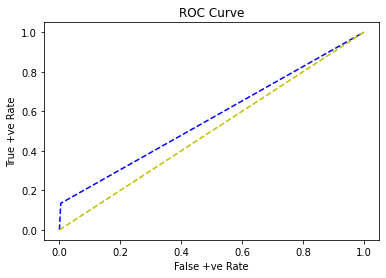

In [78]:
#roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr,tpr,'b--')
plt.plot([0,1],[0,1],'y--')
#plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
#RandomForestClassifier working better